In [1]:
import tensorflow as tf # for implementing optimization
import numpy as np 
import matplotlib.pyplot as plt 
import sys 

sys.path.insert(0, '/home/degnaiyu/Työpöytä/kanditutkielma/kandityo_koodit/main')

import monteCarloIntegration as mc 

2023-02-04 13:48:52.152908: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-04 13:48:52.352610: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-04 13:48:52.352626: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-04 13:48:53.012895: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## The function 

In [2]:
# testattu 
def gradientDescentFunc(expr, paramVariables: list, initialParamValues: list,learning_rate: float = 0.001,  limitForLoop: int = 100): 
    '''
    Compute gradient descent from sympy expression, which has symbols. 
    
    Gradient descent update algorithm: alpha_i = alpha_(i-1)- learning_rate * gradient(expr)
    
    - expr: sympy expression 
    - paramVariables: list of sympy symbols used in the "expr". e.g. [sym.Symbol('a'), sym.Symbol('b')]
    - paramValues: current values of the parameters. Acts as initial values.
    - learning rate 
    
    
    
    Example: simple usage 
    
        # Define the sympy symbols to be used in the function
        x = symbols('x')
        y = symbols('y')
        #Define the function in terms of x and y
        f1 = (x-2) ** 2 + (y-2)**2+5      # sympy expression 


        paramVariables = [x, y]
        initialParamValues = [3.0, 3.0]

        gradientDescentFunc(f1, paramVariables = paramVariables, initialParamValues = initialParamValues )
    
    
    '''
    
    
    # error check: whether the length of paramVariables is the same as initialParamValues 
    if (len(paramVariables) != len(initialParamValues)): 
        print('Error: Length of the list of initial values must be the same as number of symbolic variables!!!')
        return 
    
    
    partialDerivativeList = [diff(expr, variable) for variable in paramVariables ]   # list of partial derivatives with respect to possible variables in the expr
    
    paramValuesList = initialParamValues.copy()  # list of parameter values, each representing its own parameter e.g. [2.0, 2.0] for [alpha, beta]
    
    
    # dictionary with format: 
    #     {
    #         sym.Symbol('a'):3, 
    #         sym.Symbol('b'):4, 

    #     }
    
    
    
    
    # list of gradients for determining when to cut the loop 
    # if parameters reached minimum, gradient should be zero
    gradientList = np.random.randint(low = 100, size = len(paramValuesList))  # initiating gradientList with random large numbers

    
    
    counter = 0 
    #Perform gradient descent
    while ( np.array(gradientList) < 0.001).all() == False :         # if all gradients are bigger or equal to 0.1, continue descending 
        counter += 1 
        
        # clean the list
        gradientList = []
        
        # update each parameter value with negative gradient descent 
        for index in range(len(paramValuesList)): 
            # for later substitution when evaluating derivatives  
            substitutionDict = {paramVariables[i]:paramValuesList[i] for i in range(len(paramVariables))}
                
                
            # gradient-descenting one parameter 
            paramValuesList[index] -= partialDerivativeList[index].evalf(subs=substitutionDict)*learning_rate
            
            gradientList.append(partialDerivativeList[index].evalf(subs=substitutionDict))  # appending the gradient to the list 
        

        
        # if user not wanting for too much loops, or not wanting to reach the local minimum,
        # or loop last too long, break the loop 
        if counter >= limitForLoop: 
            break 
    
    
    return paramValuesList

    

# Testable formula 

$$2x^2+x + 1 $$


$$2 xy + x^2+ y^2+ (xy)^2+1$$

$$x^2 + y^2 + z^2 + 2 x y + z y + x z$$

# Mathematica

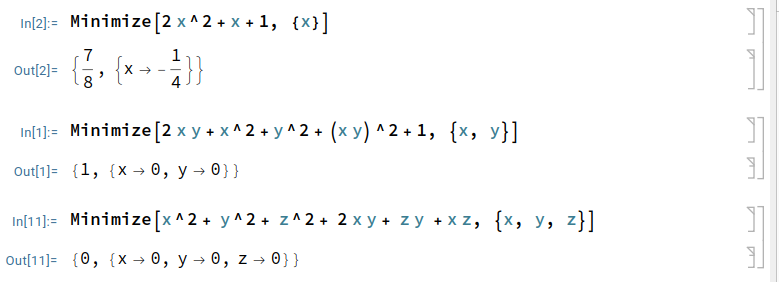

# Scipy 

In [4]:
from scipy.optimize import minimize
import sympy as sp

x_symbol = sp.Symbol('x')
y_symbol = sp.Symbol('y')
fm = 2 *x_symbol*y_symbol + x_symbol**2 + y_symbol**2 + (x_symbol*y_symbol )**2 +1 

def func(x):
    x_float, y_float = x
    return fm.subs([(x_symbol, x_float), (y_symbol, y_float)])


x0 = [1.0, 1.0]
solution = minimize(func, x0, method='SLSQP')
print(solution)

     fun: 1.00000017520492
     jac: array([0.00083716, 0.00083716])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.0002093 , 0.00020928])


# Tensorflow 

In [24]:
opt = tf.keras.optimizers.experimental.SGD(learning_rate=0.001, momentum=0)
var1 = tf.Variable(10.0)
loss = lambda: 2*var1**2 + var1+1 


for i in range(20000): 
    opt.minimize(loss, [var1])

var1.numpy()

-0.24999815

In [26]:
opt = tf.keras.optimizers.experimental.SGD(learning_rate=0.001, momentum=0)
var1, var2 = tf.Variable(10.0), tf.Variable(10.0)
loss = lambda: 2*var1*var2+ var1**2+ var2**2 + (var1*var2 )**2 +1 


for i in range(20000): 
    opt.minimize(loss, [var1, var2])

var1.numpy(), var2.numpy()

(2.1260107e-35, 2.1260107e-35)

In [33]:
opt = tf.keras.optimizers.experimental.SGD(learning_rate=0.001, momentum=0)
var1, var2, var3 = tf.Variable(10.0), tf.Variable(10.0), tf.Variable(10.0)
loss = lambda: var1**2 + var2**2 + var3**2 + 2*var1*var2+ var3*var2+ var1*var3


for i in range(20000): 
    opt.minimize(loss, [var1, var2, var3])

var1.numpy(), var2.numpy(), var3.numpy()

(-7.382515e-12, -7.382515e-12, 2.0169404e-11)

# Self-made optimization function 

In [25]:
from sympy import symbols 


# Define the sympy symbols to be used in the function
x = symbols('x')
#Define the function in terms of x and y
f1 =  2*x**2 +x +1    # sympy expression 


paramVariables = [x]
initialParamValues = [10.0]

mc.gradientDescentFunc(f1, paramVariables = paramVariables, initialParamValues = initialParamValues, learning_rate=0.0001, limitForLoop= 500000 )

[-0.249750199225797]

In [27]:
from sympy import symbols 


# Define the sympy symbols to be used in the function
x = symbols('x')
y = symbols('y')
#Define the function in terms of x and y
f1 =  2*x*y + x**2 + y**2 + (x*y )**2 +1     # sympy expression 


paramVariables = [x, y]
initialParamValues = [10.0, 10.0]

mc.gradientDescentFunc(f1, paramVariables = paramVariables, initialParamValues = initialParamValues, learning_rate=0.00001, limitForLoop= 500000 )

[-0.0360755276053145, 0.0365279691328649]

In [37]:
from sympy import symbols 


# Define the sympy symbols to be used in the function
x = symbols('x')
y = symbols('y')
z = symbols('z')
#Define the function in terms of x and y
f1 =   x**2 + y**2 + z**2 + 2*x*y+ z*y+ x*z   # sympy expression 


paramVariables = [x, y, z]
initialParamValues = [10.0, 10.0, 10.0]

mc.gradientDescentFunc(f1, paramVariables = paramVariables, initialParamValues = initialParamValues, learning_rate=0.000001, limitForLoop= 3000000 )

[-0.0172401198377563, -0.0172200853573084, 0.0470989911775135]